<a href="https://colab.research.google.com/github/djy2211/Credit/blob/main/%EC%8B%A0%EC%9A%A9%EB%93%B1%EA%B8%89_%EC%98%88%EC%B8%A1_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (19.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121749 files and direc

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('/content/train.csv')

In [4]:
train.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


In [5]:
train.shape

(96294, 15)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [7]:
train.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


In [8]:
train['대출기간'].value_counts()

 36 months    64479
 60 months    31815
Name: 대출기간, dtype: int64

In [9]:
train['근로기간'].value_counts()

10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: 근로기간, dtype: int64

In [10]:
train['주택소유상태'].value_counts()

MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: 주택소유상태, dtype: int64

In [11]:
train['대출목적'].value_counts()

부채 통합     55150
신용 카드     24500
주택 개선      6160
기타         4725
주요 구매      1803
의료         1039
자동차         797
소규모 사업      787
이사          506
휴가          466
주택          301
재생 에너지       60
Name: 대출목적, dtype: int64

In [12]:
train['대출등급'].value_counts()

B    28817
C    27623
A    16772
D    13354
E     7354
F     1954
G      420
Name: 대출등급, dtype: int64

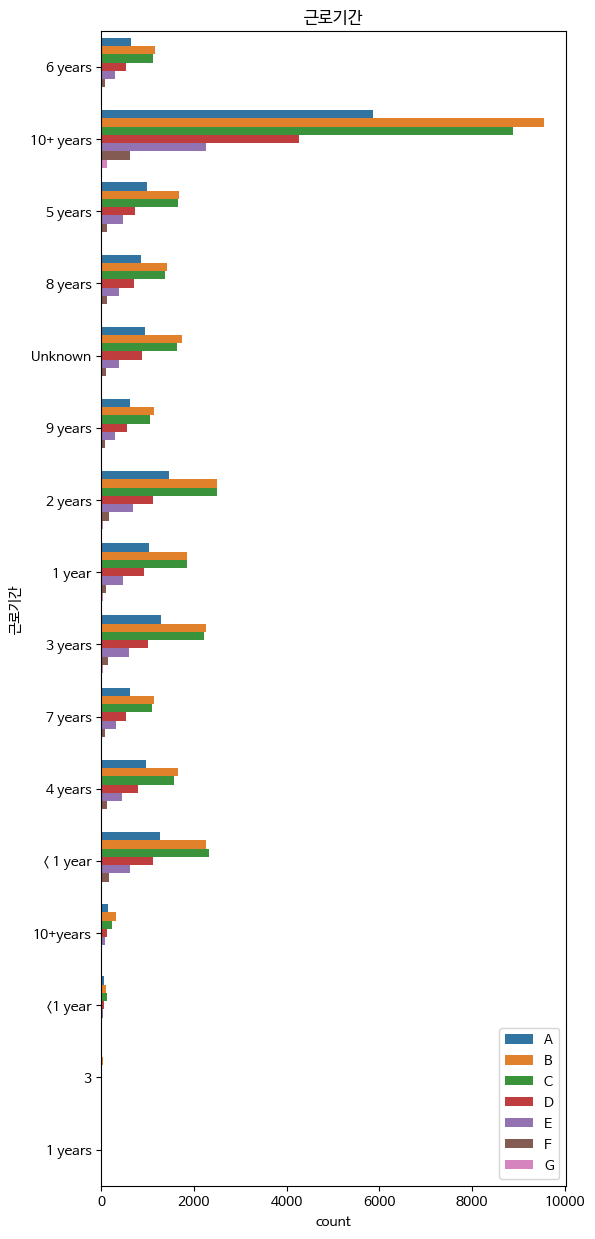

In [13]:
plt.rc('font', family='NanumBarunGothic')
plt.figure(figsize=(6,15))
sns.countplot(data=train,y=train['근로기간'], hue='대출등급', hue_order=['A','B','C','D','E','F','G'])
plt.title('근로기간')
plt.legend(loc='lower right')
plt.show()

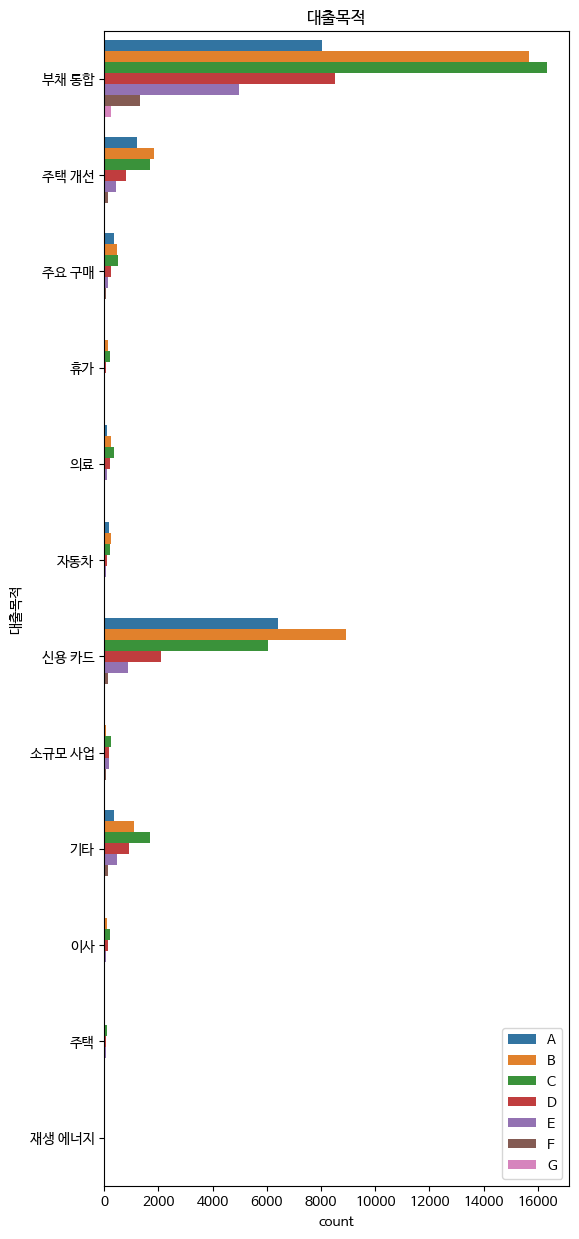

In [14]:
plt.figure(figsize=(6,15))
sns.countplot(data=train,y=train['대출목적'], hue='대출등급', hue_order=['A','B','C','D','E','F','G'])
plt.title('대출목적')
plt.legend(loc='lower right')
plt.show()

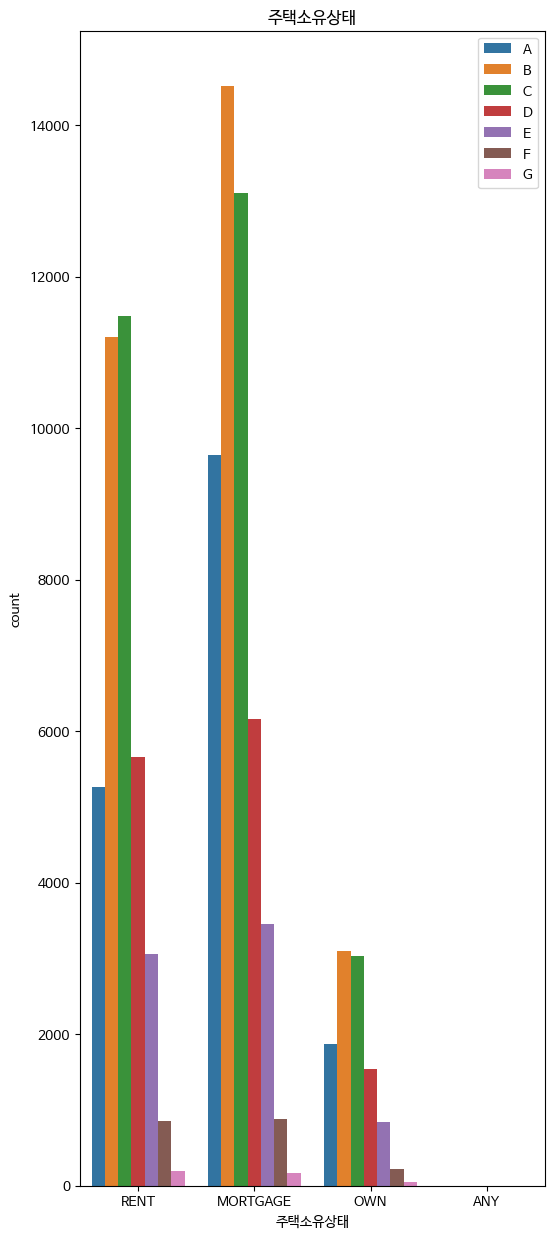

In [17]:
plt.figure(figsize=(6,15))
sns.countplot(data=train,x=train['주택소유상태'], hue='대출등급', hue_order=['A','B','C','D','E','F','G'])
plt.title('주택소유상태')
plt.legend(loc='upper right')
plt.show()

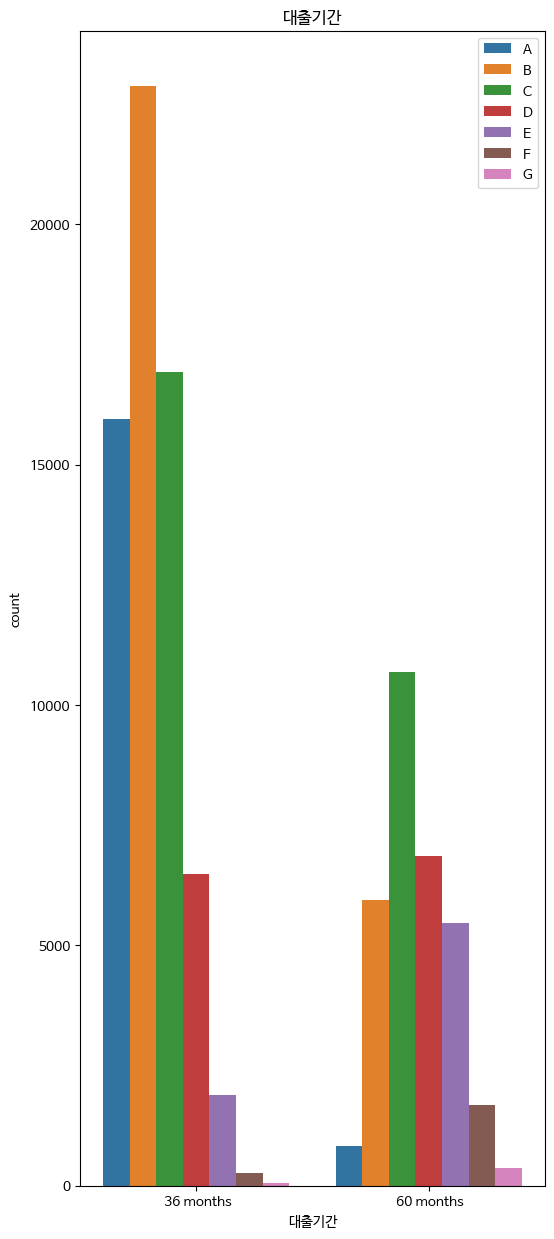

In [18]:
plt.figure(figsize=(6,15))
sns.countplot(data=train,x=train['대출기간'], hue='대출등급', hue_order=['A','B','C','D','E','F','G'])
plt.title('대출기간')
plt.legend(loc='upper right')
plt.show()

In [31]:
df = pd.DataFrame()

hue_order=['A','B','C','D','E','F','G']

In [32]:
print('연간소득')

df = pd.DataFrame()

for i in hue_order:
    level_df = train.loc[(train['대출등급']==i)][['연간소득']].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
    level_df.index = [i]

    df = pd.concat([df, level_df], axis=0)

df # 연간소득이 높아야 등급이 높다

연간소득


,mean,std,min,25%,50%,75%,max
A,1.124911e+08,1.396115e+08,11424000.0,67200000.0,96000000.0,132000000.0,1.080000e+10
B,9.570640e+07,1.160385e+08,9600000.0,58386000.0,81600000.0,114000000.0,1.044000e+10
C,8.903804e+07,7.227919e+07,0.0,54000000.0,75600000.0,108000000.0,5.576640e+09
D,8.359673e+07,6.622318e+07,2124000.0,51454800.0,72000000.0,100800000.0,3.600000e+09
E,8.492864e+07,5.582495e+07,1440000.0,54000000.0,73200000.0,102000000.0,1.800000e+09
F,8.434506e+07,4.500624e+07,10627200.0,54000000.0,75430800.0,102000000.0,6.000000e+08
G,8.258034e+07,5.407082e+07,10555200.0,50400000.0,70800000.0,96000000.0,4.344000e+08


In [33]:
print('부채_대비_소득_비율')

df = pd.DataFrame()

for i in hue_order:
    level_df = train.loc[(train['대출등급']==i)][['부채_대비_소득_비율']].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
    level_df.index = [i]

    df = pd.concat([df, level_df], axis=0)

df # 부채 대비 소득 비율도 중요한 건 아닌 것처럼 보이나, A, B등급이 평균적으로 낮음

부채_대비_소득_비율


,mean,std,min,25%,50%,75%,max
A,16.547850,7.558913,0.00,10.8200,16.130,21.8700,39.80
B,18.129529,8.191684,0.00,11.9300,17.600,23.9800,41.69
C,20.270095,60.681872,0.00,13.3000,19.510,26.3050,9999.00
D,21.808465,13.166067,0.00,14.6900,21.610,29.1575,1092.52
E,22.248466,11.977395,0.16,15.3500,21.925,29.2875,672.52
F,21.853710,8.913153,0.66,15.3925,22.125,28.3375,54.36
G,20.691952,8.718104,0.82,14.3525,21.095,26.5350,47.61


In [34]:
print('총계좌수')

df = pd.DataFrame()

for i in hue_order:
    level_df = train.loc[(train['대출등급']==i)][['총계좌수']].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
    level_df.index = [i]

    df = pd.concat([df, level_df], axis=0)

df # 총 계좌수는 딱히 영향이 없는 것처럼 보임

총계좌수


,mean,std,min,25%,50%,75%,max
A,26.910684,11.788615,4.0,18.0,25.0,34.0,96.0
B,25.223375,11.765557,4.0,17.0,24.0,32.0,140.0
C,24.695073,12.195646,4.0,16.0,23.0,31.0,151.0
D,24.705107,12.357153,4.0,16.0,23.0,31.0,169.0
E,25.320642,12.522195,4.0,16.0,23.0,32.0,109.0
F,25.543501,12.950036,4.0,17.0,23.0,32.0,98.0
G,24.550000,12.482346,4.0,15.0,23.0,32.0,76.0


In [35]:
print('최근_2년간_연체_횟수')

df = pd.DataFrame()

for i in hue_order:
    level_df = train.loc[(train['대출등급']==i)][['최근_2년간_연체_횟수']].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
    level_df.index = [i]

    df = pd.concat([df, level_df], axis=0)

df # 연체 횟수는 적어야 좋음

최근_2년간_연체_횟수


,mean,std,min,25%,50%,75%,max
A,0.218698,0.704163,0.0,0.0,0.0,0.0,18.0
B,0.365409,0.947582,0.0,0.0,0.0,0.0,16.0
C,0.380299,0.966606,0.0,0.0,0.0,0.0,30.0
D,0.384379,0.970777,0.0,0.0,0.0,0.0,16.0
E,0.349334,0.914513,0.0,0.0,0.0,0.0,18.0
F,0.361822,0.914466,0.0,0.0,0.0,0.0,10.0
G,0.416667,1.239835,0.0,0.0,0.0,0.0,17.0


In [36]:
print('총연체금액')

df = pd.DataFrame()

for i in hue_order:
    level_df = train.loc[(train['대출등급']==i)][['총연체금액']].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
    level_df.index = [i]

    df = pd.concat([df, level_df], axis=0)

df # 연체가 있으면 신용등급에는 좋지 않음

총연체금액


,mean,std,min,25%,50%,75%,max
A,14.806105,704.850463,0.0,0.0,0.0,0.0,46536.0
B,29.441371,983.715162,0.0,0.0,0.0,0.0,75216.0
C,48.052565,1258.793440,0.0,0.0,0.0,0.0,72444.0
D,113.352104,2127.823877,0.0,0.0,0.0,0.0,75768.0
E,94.572206,1678.616326,0.0,0.0,0.0,0.0,44688.0
F,237.801433,3437.789928,0.0,0.0,0.0,0.0,74076.0
G,329.942857,4448.705070,0.0,0.0,0.0,0.0,72864.0


In [37]:
print('연체계좌수')

df = pd.DataFrame()

for i in hue_order:
    level_df = train.loc[(train['대출등급']==i)][['연체계좌수']].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
    level_df.index = [i]

    df = pd.concat([df, level_df], axis=0)

df

연체계좌수


,mean,std,min,25%,50%,75%,max
A,0.001133,0.033640,0.0,0.0,0.0,0.0,1.0
B,0.004789,0.071019,0.0,0.0,0.0,0.0,2.0
C,0.007892,0.094808,0.0,0.0,0.0,0.0,4.0
D,0.008462,0.096382,0.0,0.0,0.0,0.0,2.0
E,0.007615,0.091509,0.0,0.0,0.0,0.0,2.0
F,0.006653,0.087385,0.0,0.0,0.0,0.0,2.0
G,0.004762,0.068924,0.0,0.0,0.0,0.0,1.0


In [38]:
print('총상환원금')

df = pd.DataFrame()

for i in hue_order:
    level_df = train.loc[(train['대출등급']==i)][['총상환원금']].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
    level_df.index = [i]

    df = pd.concat([df, level_df], axis=0)

df # 평균값이 높으면 등급이 높음

총상환원금


,mean,std,min,25%,50%,75%,max
A,1.066966e+06,1.076776e+06,0.0,444804.0,830280.0,1441248.0,33683988.0
B,8.340144e+05,9.403085e+05,0.0,318336.0,606564.0,1101888.0,36721164.0
C,7.521078e+05,9.753910e+05,0.0,278616.0,552132.0,963672.0,41955936.0
D,7.297173e+05,1.018910e+06,0.0,267948.0,528600.0,908784.0,39793896.0
E,7.074507e+05,1.238723e+06,0.0,288672.0,523908.0,872802.0,35550000.0
F,6.673177e+05,1.368616e+06,0.0,267030.0,490224.0,794940.0,30911292.0
G,5.870190e+05,8.149610e+05,0.0,229296.0,442188.0,764745.0,12937416.0


In [39]:
print('총상환이자')

df = pd.DataFrame()

for i in hue_order:
    level_df = train.loc[(train['대출등급']==i)][['총상환이자']].describe().T[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
    level_df.index = [i]

    df = pd.concat([df, level_df], axis=0)

df # 등급이 높을수록 이자를 덜 내는 것처럼 보임.. F, G등급은 소득이 낮아서 이런 결과가 나온 것으로 예상

총상환이자


,mean,std,min,25%,50%,75%,max
A,2.240085e+05,183508.609726,0.0,91401.0,175632.0,306678.0,1315908.0
B,3.033410e+05,268912.292532,0.0,110652.0,222228.0,421008.0,2538084.0
C,4.306745e+05,377468.910481,0.0,154560.0,323028.0,607092.0,2671956.0
D,6.117896e+05,520056.028372,0.0,220875.0,474684.0,884532.0,4048740.0
E,8.146975e+05,627671.231203,0.0,338886.0,653004.0,1168896.0,3942252.0
F,1.095274e+06,819704.001437,0.0,470883.0,900930.0,1548396.0,5653416.0
G,1.284655e+06,952955.115509,0.0,549405.0,1089972.0,1844562.0,4464612.0
